(14079, 118)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14079 entries, 0 to 14078
Columns: 118 entries, Session to composante_id_paysage
dtypes: float64(46), int64(48), object(24)
memory usage: 12.7+ MB
[[495  23]
 [ 50 244]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       518
           1       0.91      0.83      0.87       294

    accuracy                           0.91       812
   macro avg       0.91      0.89      0.90       812
weighted avg       0.91      0.91      0.91       812



/tmp/ipykernel_30158/1947779.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


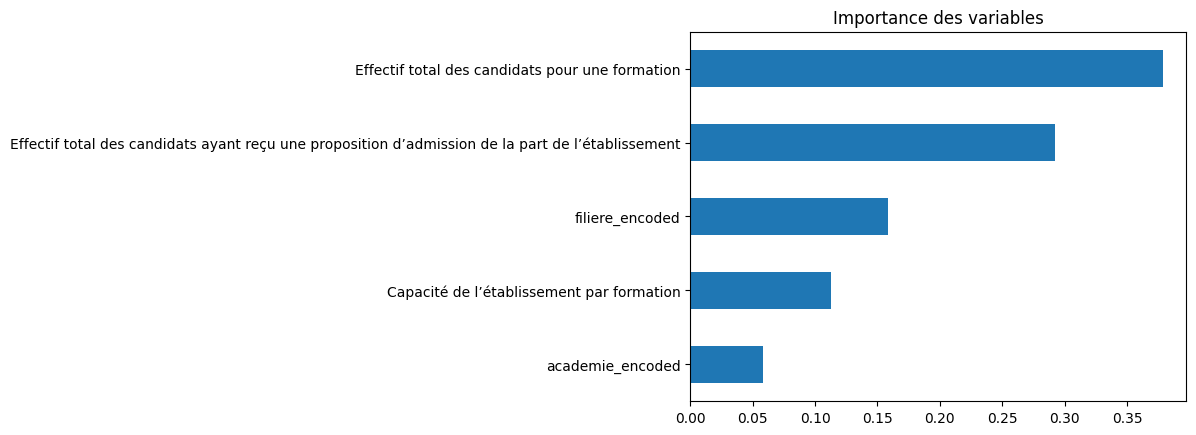

In [10]:
# Parcoursup Dataset Analysis - Jupyter Notebook

## 1. Imports et chargement des données

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


## 2. Lecture du fichier avec bon encodage et séparateur

df = pd.read_csv('fr-esr-parcoursup.csv', sep=';', encoding='utf-8')
df.columns = df.columns.str.strip()  # Nettoyage des espaces


## 3. Aperçu des données

print(df.shape)
df.head()
df.info()
df.describe(include='all')


## 4. Sélection de colonnes pertinentes (exemples)

cols = [
    "Code UAI de l'établissement",
    "Établissement",
    "Filière de formation très détaillée",
    "Région de l’établissement",
    "Académie de l’établissement",
    "Capacité de l’établissement par formation",
    "Effectif total des candidats pour une formation",
    "Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement",
    "Taux d’accès"
]
df_selected = df[cols].dropna()
df_selected = df_selected[df_selected['Taux d’accès'].apply(lambda x: isinstance(x, (int, float, str)))]
# Convert percentage values if they are strings, otherwise keep as float
df_selected["Taux d’accès"] = pd.to_numeric(df_selected["Taux d’accès"], errors='coerce')


## 5. Création d’une cible : "Sélectif" si Taux < 50%, sinon "Non-sélectif"

df_selected['selective'] = df_selected['Taux d’accès'].apply(lambda x: 1 if x < 50 else 0)


## 6. Encodage des variables catégorielles

le = LabelEncoder()
df_selected['filiere_encoded'] = le.fit_transform(df_selected["Filière de formation très détaillée"])
df_selected['academie_encoded'] = le.fit_transform(df_selected["Académie de l’établissement"])


## 7. Modèle prédictif : Random Forest

X = df_selected[[
    'Capacité de l’établissement par formation',
    'Effectif total des candidats pour une formation',
    'Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement',
    'filiere_encoded',
    'academie_encoded'
]]
y = df_selected['selective']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


## 8. Évaluation du modèle

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


## 9. Visualisation de l’importance des variables

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()


## 10. Export des données nettoyées (optionnel)

df_selected.to_csv("parcoursup_cleaned.csv", index=False)


# ST2MLE : Machine Learning for IT Engineers Project
## Machine Learning Project – Numerical and Textual Data (French Context)
### Context
As part of this project, students will work on mixed data (numerical and textual) collected from French websites.
The objective is to carry out a comprehensive analysis, from data collection to modeling
and interpretation, with a focus on a French economic, social, or public context.

### Learning Objectives
- Master the full lifecycle of a data project (collection, cleaning, preprocessing, modeling, evaluation).
- Apply techniques for text processing and numerical data analysis.
- Explore various text vectorization techniques (BoW, TF-IDF, Doc2Vec, BERT).
- Conduct analyses and provide recommendations based on real French data.

### Project Steps
1. Define a topic, the needs and identify relevant French sources.
2. Collect data (web scraping, APIs...).
3. Clean and preprocess both numerical and textual data.
4. Annotate (label) data. Some websites already include categories or tags — these can be scraped alongside the text and used as labels. Otherwise, label data manually.
5. Perform exploratory analysis and visualizations (distributions, word clouds, correlations...) to check for outliers, class imbalance, etc.
6. Apply under-sampling or oversampling (if needed), PCA for feature extraction (if needed).
7. Apply predictive models:
  - **Numerical data**: Decision Trees, Random Forest, Boosting.
  - **Textual data**: Naive Bayes, Logistic Regression after vectorization.
8. Compare text vectorization methods: BoW, TF-IDF, Doc2Vec, BERT.
9. Provide business recommendations and submit a final report.

### Technical Constraints
- Data must be exclusively from French sources.
- Texts must be in French only (use appropriate preprocessing: French lemmatization, French stopwords).
- Minimum of 500 data rows.
- Implementation in Python using scikit-learn, gensim, transformers, etc.

### Evaluation Criteria
- Quality and relevance of data collection and labeling (10%)
- Quality of data cleaning and preprocessing (10%)
- Relevance of visualizations and exploratory analysis (10%)
- Implementation of models (30%)
- Comparison and discussion of vectorization techniques (10%)
- Recommendations and critical thinking (10%)
- Quality of the report and code (5%)
- Quality of the presentation (5%)
- Q&A (10%)